#Spacy Language Processing Pipelines Tutorial

- We will start without any nlp pipeline

In [ ]:
import spacy
nlp= spacy.blank("en")
doc=nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")
for token in doc:
  print(token)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


- As you can see that spacy by default has tokenizer with it even with blank nlp pipeline.
- Pipeline is something that starts with a Tokenizer component in a dotted rectange below.
- You can see there is nothing there hence the blank pipeline

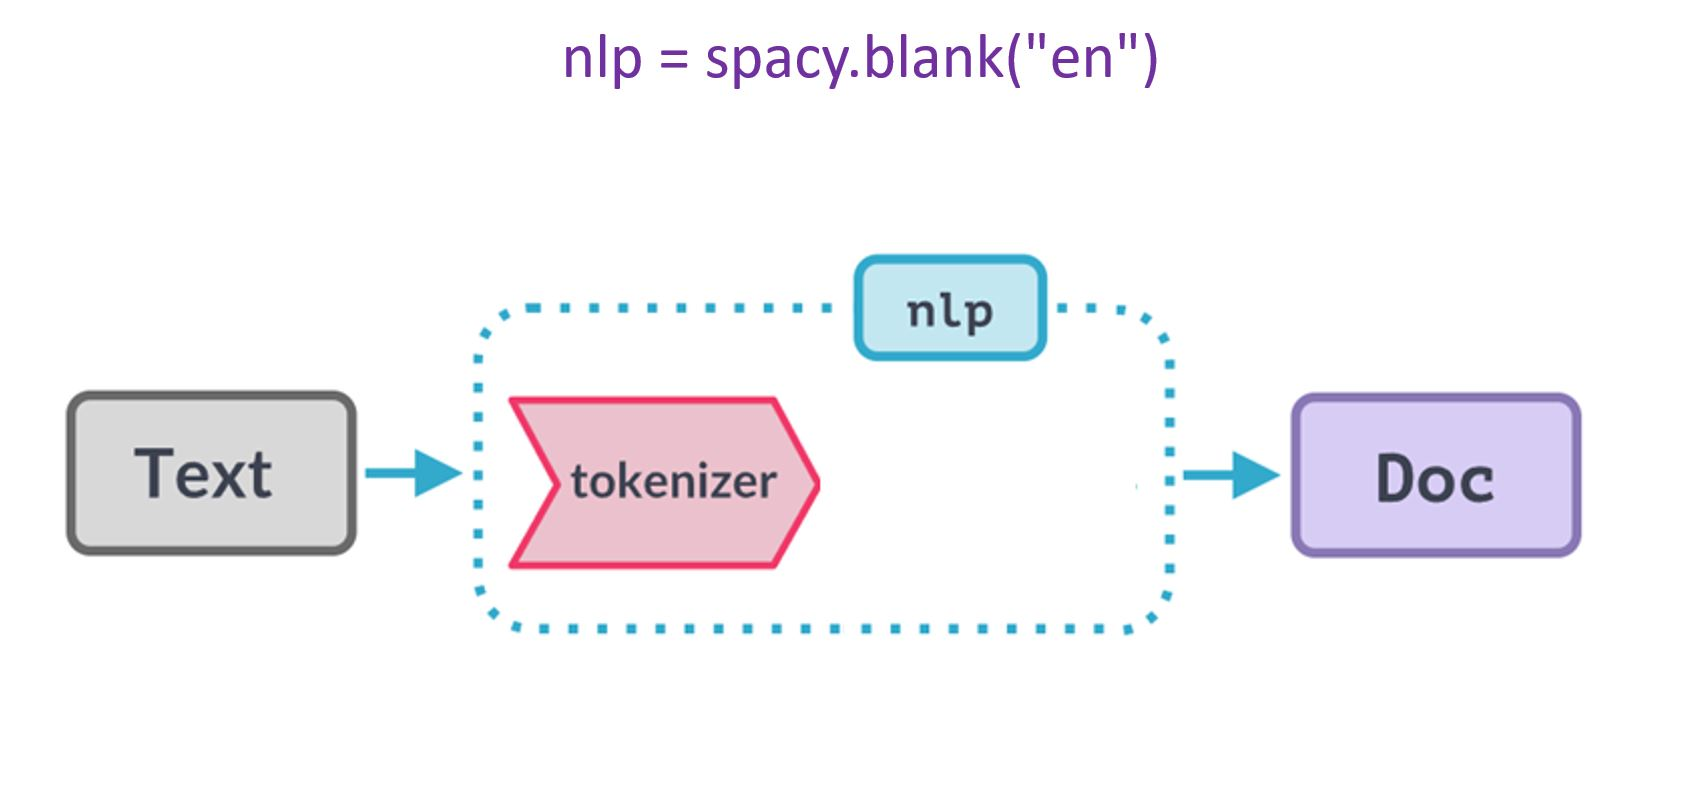

In [ ]:
# SHows blank pipeline
nlp.pipe_names

[]

-Spacy has pre-trained pipeline with every language which we can use to process text of any language
- Given is the one for English

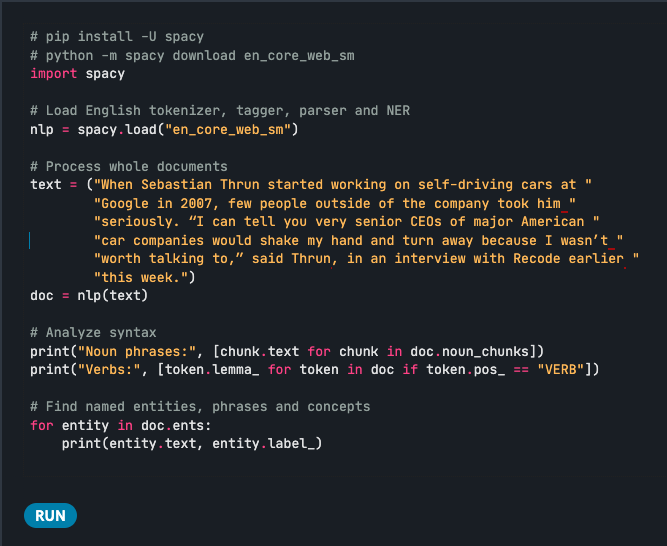

In [ ]:
nlp=spacy.load('en_core_web_sm')

- sm in en_core_web_sm means small.
- There are other models available as well such as medium, large etc. Check this: https://spacy.io/usage/models#quickstart

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
doc=nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")
for token in doc:
  print(token,"|",token.pos_,"|",token.lemma_)

Captain | PROPN | Captain
america | PROPN | america
ate | VERB | eat
100 | NUM | 100
$ | NUM | $
of | ADP | of
samosa | PROPN | samosa
. | PUNCT | .
Then | ADV | then
he | PRON | he
said | VERB | say
I | PRON | I
can | AUX | can
do | VERB | do
this | PRON | this
all | DET | all
day | NOUN | day
. | PUNCT | .


In [ ]:
doc=nlp("Captain america ate 100$ of samosa. Then he said I can do this all day.")
for ent in doc:
  print(ent)

Captain
america
ate
100
$
of
samosa
.
Then
he
said
I
can
do
this
all
day
.


#Named Entity Recognition

In [ ]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent)

Tesla Inc
$45 billion


In [ ]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

Tesla Inc ORG
$45 billion MONEY


In [ ]:
from spacy import displacy
displacy.render(doc,style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">\n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Tesla Inc\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n is going to acquire twitter for \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    $45 billion\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">MONEY</span>\n</mark>\n</div>'

#Trained processing pipeline in French

In [ ]:
!python -m spacy download fr_core_news_sm

2023-07-03 14:13:28.969495: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 66.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [ ]:
import fr_core_news_sm
nlp = spacy.load("fr_core_news_sm")
nlp=spacy.blank("fr")

In [ ]:
doc = nlp("Tesla Inc va racheter Twitter pour $45 milliards de dollars")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

#Adding a component to a blank pipeline

- Lets's say we just want to evaluate ner component in our text

In [ ]:
source_nlp=spacy.load("en_core_web_sm") #adding english pipeline

nlp=spacy.blank("en") # creating an blank pipeline

nlp.add_pipe('ner',source=source_nlp) # from source_nlp we are adding 'ner' component
nlp.pipe_names

['ner']

In [ ]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
for ent in doc.ents:
    print(ent.text, ent.label_)

Tesla Inc ORG
$45 billion MONEY


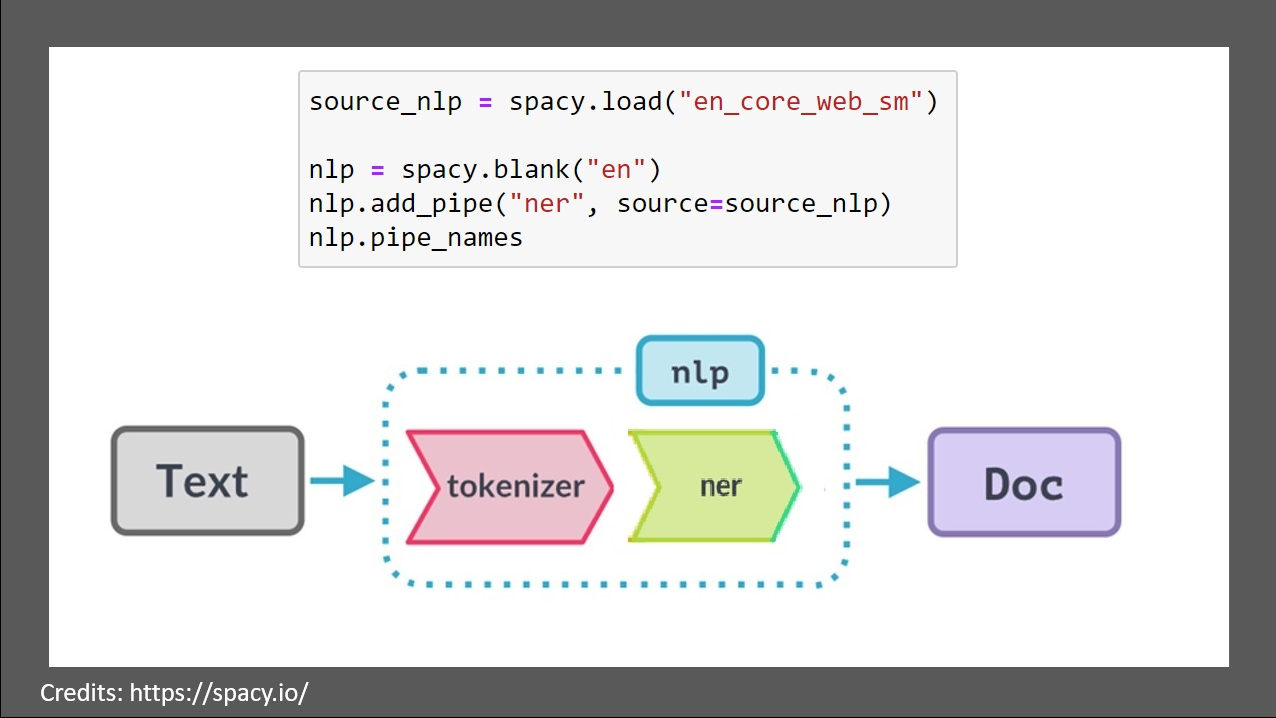